<a href="https://colab.research.google.com/github/partizanos/advanced_image_processing/blob/master/AIP_TP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP5 Dimitris Proios



## Exercise 1. Single image compression
### Take any image x from the EXT YALE dataset given in the TP3. Compress this image in its own optimal SVD basis as: [ U, S, V ] = svd(x)
$$ x_k = U (:, 1 : k) · S(1 : k, 1 : k) · V (:, 1 : k)^T$$


--2019-05-30 18:08:58--  https://github.com/partizanos/advanced_image_processing/blob/master/EXT_YALE_B_Normal.mat?raw=true
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/partizanos/advanced_image_processing/raw/master/EXT_YALE_B_Normal.mat [following]
--2019-05-30 18:08:59--  https://github.com/partizanos/advanced_image_processing/raw/master/EXT_YALE_B_Normal.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/partizanos/advanced_image_processing/master/EXT_YALE_B_Normal.mat [following]
--2019-05-30 18:08:59--  https://raw.githubusercontent.com/partizanos/advanced_image_processing/master/EXT_YALE_B_Normal.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to 

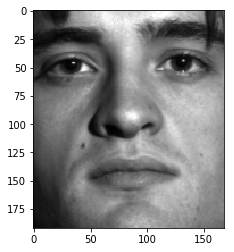

In [1]:
# READ DATASET
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import math
from scipy import fftpack 

!wget https://github.com/partizanos/advanced_image_processing/blob/master/EXT_YALE_B_Normal.mat?raw=true
!mv EXT_YALE_B_Normal.mat\?raw\=true data.mat

from scipy import io
v = io.loadmat('data.mat')

imagesOrig = v["faceData"]
imagesOrig = imagesOrig.astype("float32")
imagesOrig = imagesOrig.transpose()
images = imagesOrig.reshape((2432,168, 192))
img = images[1000].transpose()
plt.imshow(img, cmap = "gray"); plt.show()


def mse(imageA, imageB) -> float:
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err


def svd_compress(img, k=10):
  U,s,V = np.linalg.svd(img,full_matrices=False)
  reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))  
  return U,s,V,reconst_matrix


### Display the original and compressed images for k = {1, 2, ..., 20}

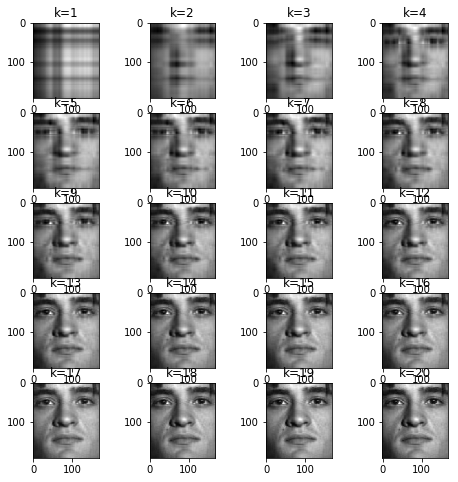

In [2]:
# plt.imshow(reconst_matrix, cmap = "gray"); plt.show()
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
k=1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    U,s,V,reconst_matrix = svd_compress(img, k)
    plt.imshow(reconst_matrix, "gray")
    plt.title("k="+str(k))
    k+= 1

plt.show()

### Plot the dependency betwee the k and the MSE between the original and corresponding compressed image.

Text(0, 0.5, 'MSE')

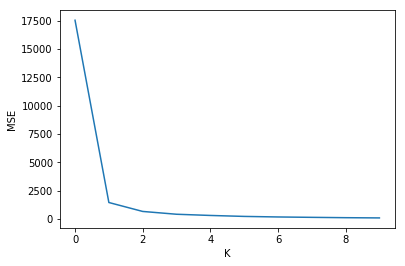

In [3]:
mses = []
Ks = [k for k in range(10)]
for k in Ks:
  U,s,V,im_dis = svd_compress(img, k)
  mses.append(mse(img, im_dis))

plt.plot( mses)
plt.xlabel("K")
plt.ylabel("MSE")


### Make a conclusion about the efficiency of such kind compression. What are advantages and disadvantages of this approach? 

This method is using SVD optimally for this image.
But it will perform poorly for other images

## Exercise 2. Compression in a global learned basis

### Take a subset of similar and well aligned images X from the EXT YALE dataset. Learn an optimal basis W via the SVD decomposition of subset the X.



In [4]:
images_subset = images[:20]
images_subset.shape

(20, 168, 192)

### Take any image x from X and for k = {1, 2, ..., 10} compress it as:$$ x̃ = W (:, 1 : k) (W^T x)$$

images_subset
(20, 168, 192)
concated_images.shape
(192, 3360)


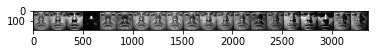

W.shape
(192, 192)
img_compressed
(168, 192)


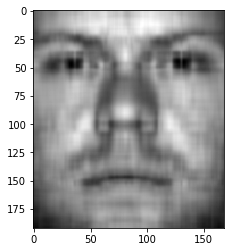

In [5]:
def calc_W(images):
  W,s,V = np.linalg.svd(images,full_matrices=False)
  return W

def compression_2(img, W, k):
  W_W_T = np.dot(W[:,:k], W[:,:k].transpose())
#   print("img ")
#   print(img.shape)

#   print("W_W_T")
#   print(W_W_T.shape)
  res = np.dot(img, W_W_T)
  return res

print("images_subset")
print(images_subset.shape)
concated_images = images_subset.reshape(images_subset.shape[0]*images_subset.shape[1],  images_subset.shape[2])
concated_images = concated_images.transpose()
print("concated_images.shape")
print(concated_images.shape)
plt.imshow(concated_images, "gray"); plt.show()

W = calc_W(concated_images)
print("W.shape")
print(W.shape)


img = images_subset[0]
plt.imshow(img, "gray")

k=10
img_compressed = compression_2(img, W, k)

print("img_compressed")
print(img_compressed.shape)
plt.imshow(img_compressed.transpose(), "gray")

### Visualise the basis vectors and the compressed images for k = {1, 2, ..., 10}.

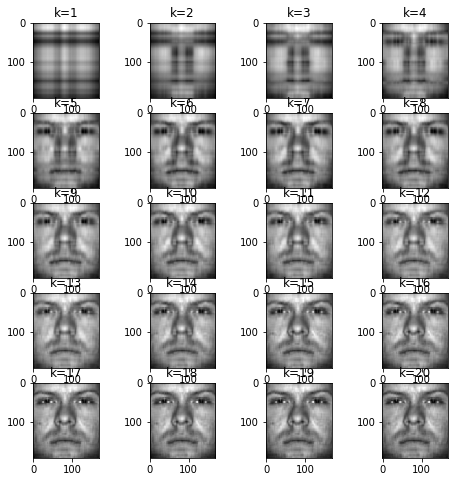

In [6]:
# plt.imshow(reconst_matrix, cmap = "gray"); plt.show()
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
k=1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    reconst_matrix = compression_2(img, W, k)
    plt.imshow(reconst_matrix.transpose(), "gray")
    plt.title("k="+str(k))
    k+= 1

plt.show()

### Plot the dependency betwee the k and the MSE between the original and corresponding compressed image.

K 0 MSE 14388.116412450398
K 1 MSE 768.2188442628101
K 2 MSE 424.3873841717418
K 3 MSE 364.84619934028865
K 4 MSE 279.69651372213434
K 5 MSE 221.3378394606253
K 6 MSE 153.6119409055471
K 7 MSE 143.86707776790897
K 8 MSE 134.36495137097623
K 9 MSE 111.24506126789444


Text(0, 0.5, 'MSE')

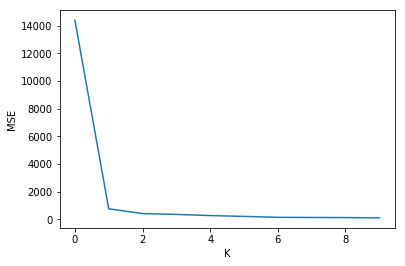

In [7]:
mses = []
Ks = [k for k in range(10)]
for k in Ks:
  im_dis = compression_2(img, W, k)
  print("K",k,"MSE",mse(img, im_dis))
  mses.append(mse(img, im_dis))

plt.plot( mses)
plt.xlabel("K")
plt.ylabel("MSE")

### Make a conclusion about the efficiency of such kind compression compared with the method in the exercise 1.

It behaves worse than method one since SVD is generalized with the basis vectors of many images.

## Exercise 3  Compression in a local patch based basis
###  Take any image x from the EXT YALE dataset. Split this image into non-overlapping blocks of size 11 × 11. Learn an optimal basis W on these patches similar to the exercise 2.


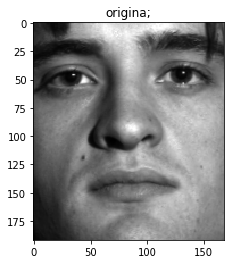

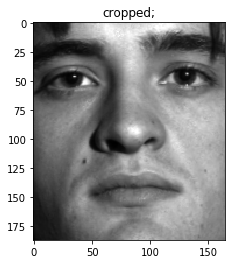

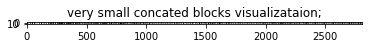

(2805, 11)

In [8]:
imagesOrig = v["faceData"]
imagesOrig = imagesOrig.astype("float32")
imagesOrig = imagesOrig.transpose()
images = imagesOrig.reshape((2432,168, 192))
img = images[1000].transpose()
plt.imshow(img, cmap = "gray"); plt.title("origina;"); plt.show()

# cant break the images exactly to 11x11 blocks so I will crop a bit

def crop_img(img, block_size):
  size_X = int(img.shape[0] /block_size) * block_size
  size_Y = int(img.shape[1] /block_size) * block_size
  return img[:size_X, :size_Y]
block_size = 11
cr_img = crop_img(img, block_size)
img.shape, cr_img.shape

number_blocks = cr_img.shape[0] * cr_img.shape[1] / block_size *block_size
cr_img_blocks = cr_img.reshape(255, block_size, block_size)
plt.imshow(cr_img, cmap = "gray"); plt.title("cropped;");  plt.show()
cr_img_blocks.shape
cr_img_blocks_concated = cr_img_blocks.reshape((cr_img_blocks.shape[0] * cr_img_blocks.shape[1], cr_img_blocks.shape[2]))
plt.imshow(cr_img_blocks_concated.transpose(), cmap = "gray"); plt.title("very small concated blocks visualizataion;");  plt.show()
cr_img_blocks_concated.shape

### Perform the image x compression in the basis W similar to the exercise 2.



(187, 165)


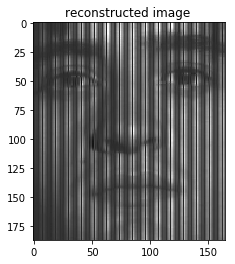

In [32]:
def calc_W(images):
  W,s,V = np.linalg.svd(images,full_matrices=False)
  return W

def compression_2(img, W, k):
  W_W_T = np.dot( W[:k, :].transpose(), W[:k,:])
  res = np.dot(img, W_W_T)
  return res
W = calc_W(cr_img_blocks_concated)
block = cr_img_blocks[0]
k=10
all_blocks=[]
for block in cr_img_blocks:
  block_compressed = compression_2(block, W, k)
  all_blocks.append(block_compressed)
all_blocks= np.array(all_blocks)

lenX = int(cr_img.shape[0] /block_size) 
lenY = int(cr_img.shape[1] /block_size) 
all_blocks = all_blocks.reshape((lenX,lenY, block_size, block_size ))

img = all_blocks.reshape((lenX*block_size,lenY*block_size ))

print(img.shape)
plt.imshow(img, cmap = "gray"); plt.title("reconstructed image ");  plt.show()


### Visualise the basis vectors and the compressed images for k = {1, 2, ..., 10}.


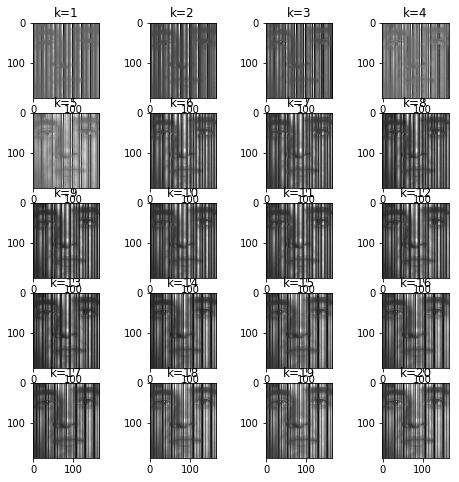

In [36]:
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
k=1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    all_blocks=[]
    
    for index,block in enumerate(cr_img_blocks):
      block_compressed = compression_2(block, W, k)
      all_blocks.append(block_compressed)
    all_blocks= np.array(all_blocks)
    all_blocks = all_blocks.reshape((lenX,lenY, block_size, block_size ))
    img = all_blocks.reshape((lenX*block_size,lenY*block_size ))

    plt.imshow(img, "gray")
    plt.title("k="+str(k))
    k+= 1

plt.show()


### Plot the dependency betwee the k and the MSE between the original and corresponding compressed image.


K 0 MSE 17643.446767136607
K 1 MSE 17627.508793880395
K 2 MSE 17619.38426472276
K 3 MSE 17605.215884783076
K 4 MSE 17604.500586070986
K 5 MSE 17535.593373103973
K 6 MSE 17481.006769736283
K 7 MSE 17469.403048395732
K 8 MSE 17461.023384612585
K 9 MSE 17423.52453309719


Text(0, 0.5, 'MSE')

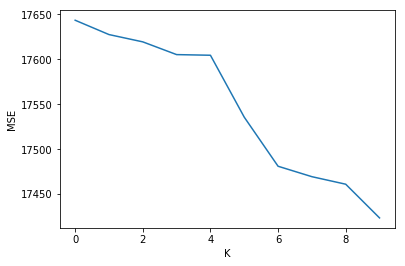

In [38]:
mses = []
Ks = [k for k in range(10)]
for k in Ks:
  all_blocks = []
  for index,block in enumerate(cr_img_blocks):
      block_compressed = compression_2(block, W, k)
      all_blocks.append(block_compressed)
  all_blocks= np.array(all_blocks)
  all_blocks = all_blocks.reshape((lenX,lenY, block_size, block_size ))
  im_dis = all_blocks.reshape((lenX*block_size,lenY*block_size ))

  print("K",k,"MSE",mse(cr_img, im_dis))
  mses.append(mse(cr_img, im_dis))

plt.plot( mses)
plt.xlabel("K")
plt.ylabel("MSE")

### Make a conclusion about the efficiency of such kind compression compared with the methods in the exercises 1 and 2.

In theory it shoulld be better than exercise 2 I am not sure why but I am getting soe weird line in the visualizations.

## Exercise 4. Compression in a global patch based basis
### Take a subset of similar and well aligned images X from the EXT YALE dataset. Split these images into non-overlapping blocks of size 11 × 11. Learn an optimal basis W on these patches similar to the exercise 3.


In [63]:
v = io.loadmat('data.mat')

imagesOrig = v["faceData"]
imagesOrig = imagesOrig.astype("float32")
imagesOrig = imagesOrig.transpose()
images = imagesOrig.reshape((2432,168, 192))
images_subset = images[:20]

def crop_img(img, block_size):
  size_X = int(img.shape[0] /block_size) * block_size
  size_Y = int(img.shape[1] /block_size) * block_size
  return img[:size_X, :size_Y]

def calc_W(images):
  W,s,V = np.linalg.svd(images,full_matrices=False)
  return W

block_size = 11
all_images_blocks = []

for img in images_subset:
  img = img.transpose()
  cr_img = crop_img(img, block_size)

  number_blocks = cr_img.shape[0] * cr_img.shape[1] / block_size *block_size
  cr_img_blocks = cr_img.reshape(255, block_size, block_size)
  cr_img_blocks_concated = cr_img_blocks.reshape((cr_img_blocks.shape[0] * cr_img_blocks.shape[1], cr_img_blocks.shape[2]))
  all_images_blocks.append(cr_img_blocks_concated)

  
all_images_blocks = np.array(all_images_blocks)
all_images_blocks=all_images_blocks.reshape((20*2805, 11))
W = calc_W(all_images_blocks)
W.shape

(56100, 11)

### Take any image x from the subset X. Perform its compression in the basis W similar to the exercise 3.


(187, 165)


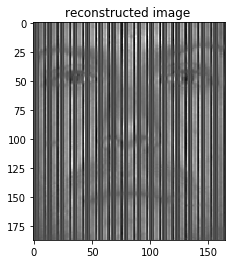

In [64]:
def compression_2(img, W, k):
  W_W_T = np.dot( W[:k, :].transpose(), W[:k,:])
  res = np.dot(img, W_W_T)
  return res

img = images_subset[0]

img = img.transpose()
cr_img = crop_img(img, block_size)
k=10
all_blocks=[]

number_blocks = cr_img.shape[0] * cr_img.shape[1] / block_size *block_size
cr_img_blocks = cr_img.reshape(255, block_size, block_size)
  
for block in cr_img_blocks:
  block_compressed = compression_2(block, W, k)
  all_blocks.append(block_compressed)
all_blocks= np.array(all_blocks)

lenX = int(cr_img.shape[0] /block_size) 
lenY = int(cr_img.shape[1] /block_size) 
all_blocks = all_blocks.reshape((lenX,lenY, block_size, block_size ))

img = all_blocks.reshape((lenX*block_size,lenY*block_size ))

print(img.shape)
plt.imshow(img, cmap = "gray"); plt.title("reconstructed image ");  plt.show()


### Visualise the basis vectors and the compressed images for k = {1, 2, ..., 10}.
### Plot the dependency betwee the k and the MSE between the original and corresponding compressed image.

K 0 MSE 14695.632668935343
K 1 MSE 14695.516874431816
K 2 MSE 14695.496863408316
K 3 MSE 14695.487670838076
K 4 MSE 14695.104465392156
K 5 MSE 14695.0335593104
K 6 MSE 14695.003025907052
K 7 MSE 14693.804624434797
K 8 MSE 14693.471237713678
K 9 MSE 14693.389743746418


Text(0, 0.5, 'MSE')

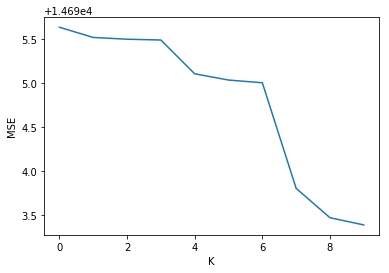

In [65]:
mses = []
Ks = [k for k in range(10)]
for k in Ks:
  all_blocks = []
  for index,block in enumerate(cr_img_blocks):
      block_compressed = compression_2(block, W, k)
      all_blocks.append(block_compressed)
  all_blocks= np.array(all_blocks)
  all_blocks = all_blocks.reshape((lenX,lenY, block_size, block_size ))
  im_dis = all_blocks.reshape((lenX*block_size,lenY*block_size ))

  print("K",k,"MSE",mse(cr_img, im_dis))
  mses.append(mse(cr_img, im_dis))

plt.plot( mses)
plt.xlabel("K")
plt.ylabel("MSE")


### Make a conclusion about the efficiency of such kind compression compared with the methods in the exercises 1, 2 and 3.

I have an enhanced error with the blocks heree but in theory this should behave better than compression 2 and worse than 1 and 3.